

## Gender Recognition From Vocal Data  

Given *vocal data from various people*, let's try to predict the **gender** of a given person.  
  
We will use two different TensorFlow neural networks (one a CNN) to make our predictions.

# Getting Started

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [2]:
data = pd.read_csv('/content/voice.csv')

In [3]:
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

# Encoding Labels

In [5]:
label_encoder = LabelEncoder()

data['label'] = label_encoder.fit_transform(data['label'])

In [6]:
dict(enumerate(label_encoder.classes_))

{0: 'female', 1: 'male'}

In [7]:
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0


# Splitting and Scaling

In [8]:
y = data['label'].copy()
X = data.drop('label', axis=1).copy()

In [9]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Modeling and Training

In [11]:
X.shape

(3168, 20)

In [12]:
inputs = tf.keras.Input(shape=(X.shape[1],))

x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense (Dense)               (None, 64)                1344      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,569
Trainable params: 5,569
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
56/56 [==============================] - 2s 8ms/step - loss: 0.4926 - accuracy: 0.7795 - auc: 0.8542 - val_loss: 0.2498 - val_accuracy: 0.9527 - val_auc: 0.9923
Epoch 2/100
56/56 [==============================] - 0s 3ms/step - loss: 0.1696 - accuracy: 0.9616 - auc: 0.9898 - val_loss: 0.1002 - val_accuracy: 0.9797 - val_auc: 0.9951
Epoch 3/100
56/56 [==============================] - 0s 3ms/step - loss: 0.0969 - accuracy: 0.9679 - auc: 0.9948 - val_loss: 0.0786 - val_accuracy: 0.9797 - val_auc: 0.9953
Epoch 4/100
56/56 [==============================] - 0s 3ms/step - loss: 0.0772 - accuracy: 0.9752 - auc: 0.9965 - val_loss: 0.0667 - val_accuracy: 0.9820 - val_auc: 0.9963
Epoch 5/100
56/56 [==============================] - 0s 3ms/step - loss: 0.0699 - accuracy: 0.9763 - auc: 0.9968 - val_loss: 0.0616 - val_accuracy: 0.9842 - val_auc: 0.9963
Epoch 6/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0662 - accuracy: 0.9786 - auc: 0.9971 - val_loss: 0.0572 - v

In [15]:
model.evaluate(X_test, y_test)

30/30 [==============================] - 0s 2ms/step - loss: 0.0618 - accuracy: 0.9779 - auc: 0.9978


[0.06178925186395645, 0.9779179692268372, 0.9977786540985107]

# Using 2D CNNs

In [16]:
X = tf.keras.preprocessing.sequence.pad_sequences(X, dtype=np.float, maxlen=25, padding='post')
X = X.reshape(-1, 5, 5)
X = np.expand_dims(X, axis=3)

<ipython-input-16-1cd93647b5ab>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = tf.keras.preprocessing.sequence.pad_sequences(X, dtype=np.float, maxlen=25, padding='post')


In [17]:
X.shape

(3168, 5, 5, 1)

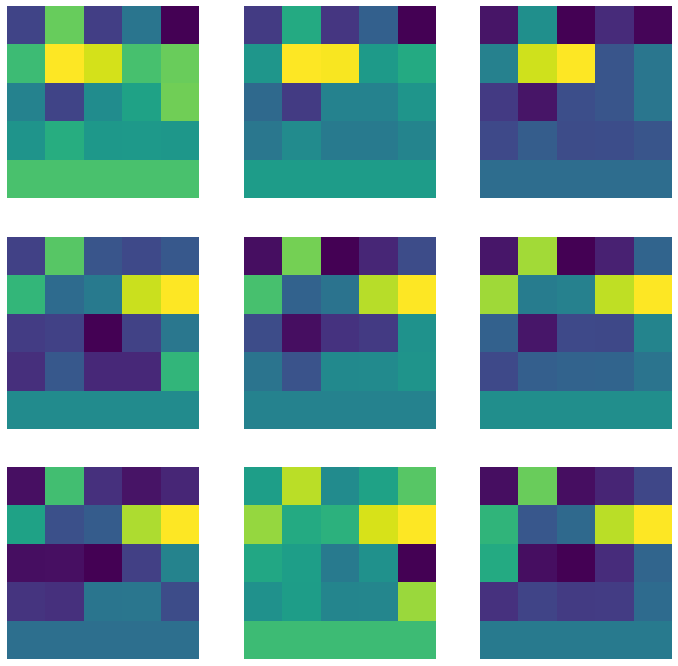

In [18]:
plt.figure(figsize=(12, 12))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(np.squeeze(X[i]))
    plt.axis('off')
    
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [20]:
inputs = tf.keras.Input(shape=(X.shape[1], X.shape[2], X.shape[3]))

x = tf.keras.layers.Conv2D(16, 2, activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.Conv2D(32, 1, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(64, activation='relu')(x)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

In [21]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 5, 5, 1)]         0         
                                                                 
 conv2d (Conv2D)             (None, 4, 4, 16)          80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 32)          544       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32)                0   

In [22]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
56/56 [==============================] - 2s 9ms/step - loss: 0.6406 - accuracy: 0.6323 - auc: 0.7716 - val_loss: 0.5752 - val_accuracy: 0.7365 - val_auc: 0.8421
Epoch 2/100
56/56 [==============================] - 0s 4ms/step - loss: 0.4783 - accuracy: 0.8274 - auc: 0.9088 - val_loss: 0.3972 - val_accuracy: 0.8739 - val_auc: 0.9405
Epoch 3/100
56/56 [==============================] - 0s 4ms/step - loss: 0.3198 - accuracy: 0.9052 - auc: 0.9585 - val_loss: 0.2804 - val_accuracy: 0.9099 - val_auc: 0.9624
Epoch 4/100
56/56 [==============================] - 0s 4ms/step - loss: 0.2310 - accuracy: 0.9171 - auc: 0.9754 - val_loss: 0.2188 - val_accuracy: 0.9302 - val_auc: 0.9756
Epoch 5/100
56/56 [==============================] - 0s 3ms/step - loss: 0.1892 - accuracy: 0.9250 - auc: 0.9819 - val_loss: 0.1903 - val_accuracy: 0.9324 - val_auc: 0.9817
Epoch 6/100
56/56 [==============================] - 0s 4ms/step - loss: 0.1686 - accuracy: 0.9312 - auc: 0.9848 - val_loss: 0.1672 - v

In [23]:
model.evaluate(X_test, y_test)

30/30 [==============================] - 0s 2ms/step - loss: 0.1098 - accuracy: 0.9527 - auc: 0.9930


[0.10977411270141602, 0.9526813626289368, 0.9929793477058411]

In [24]:
inputs = tf.keras.Input(shape=(X.shape[1], X.shape[2], X.shape[3]))

x = tf.keras.layers.Conv2D(32, 2, activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.Conv2D(64, 1, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(64, activation='relu')(x)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

In [25]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 5, 5, 1)]         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 32)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 64)          2112      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 1, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 64)                0   

In [26]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
56/56 [==============================] - 2s 9ms/step - loss: 0.6201 - accuracy: 0.7078 - auc: 0.7866 - val_loss: 0.5368 - val_accuracy: 0.7500 - val_auc: 0.8790
Epoch 2/100
56/56 [==============================] - 0s 4ms/step - loss: 0.4348 - accuracy: 0.8483 - auc: 0.9308 - val_loss: 0.3309 - val_accuracy: 0.8829 - val_auc: 0.9776
Epoch 3/100
56/56 [==============================] - 0s 4ms/step - loss: 0.2568 - accuracy: 0.9165 - auc: 0.9770 - val_loss: 0.2039 - val_accuracy: 0.9392 - val_auc: 0.9855
Epoch 4/100
56/56 [==============================] - 0s 3ms/step - loss: 0.1901 - accuracy: 0.9278 - auc: 0.9822 - val_loss: 0.1562 - val_accuracy: 0.9414 - val_auc: 0.9892
Epoch 5/100
56/56 [==============================] - 0s 4ms/step - loss: 0.1563 - accuracy: 0.9419 - auc: 0.9870 - val_loss: 0.1400 - val_accuracy: 0.9550 - val_auc: 0.9919
Epoch 6/100
56/56 [==============================] - 0s 5ms/step - loss: 0.1373 - accuracy: 0.9492 - auc: 0.9898 - val_loss: 0.1325 - v

In [27]:
model.evaluate(X_test, y_test)

30/30 [==============================] - 0s 6ms/step - loss: 0.0745 - accuracy: 0.9685 - auc: 0.9968


[0.07451311498880386, 0.9684542417526245, 0.9968432188034058]